## Works on categorical values(0 or 1)..
### It has 'S' shaped graph..


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* y = 1/(1+e^-x)

It has 3 type
* Binomial --> Two passible ways(yes or no)
* Multinomial -->  More than 2 and unordered,no rank
* Ordinal --> More than 2 and ordered,rank

In [ ]:
df = pd.read_csv("cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [ ]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [ ]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [ ]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [ ]:
df.dropna(inplace=True)             ## Drop null values

In [ ]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [ ]:
df.duplicated().sum()

172

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
loyal_cust = df[df["Customer Type"]== 'Loyal Customer']
disloyal_cust = df[df["Customer Type"]=='disloyal Customer']

In [ ]:
loyal_cust.value_counts()

Gender  Customer Type   Type of Travel   Class     satisfaction             Age  Flight Distance  Inflight entertainment  Baggage handling  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes
Female  Loyal Customer  Business travel  Business  neutral or dissatisfied  7    502              4                       4                 4            17                          2.0                         1
Male    Loyal Customer  Business travel  Business  satisfied                48   2347             5                       5                 4            0                           0.0                         1
                                                                                 2338             5                       5                 4            12                          3.0                         1
                                                                                 2336             4                       4                 4            0       

In [ ]:
disloyal_cust.value_counts()

Gender  Customer Type      Type of Travel   Class     satisfaction             Age  Flight Distance  Inflight entertainment  Baggage handling  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes
Female  disloyal Customer  Business travel  Business  neutral or dissatisfied  7    557              4                       4                 4            0                           1.0                         1
Male    disloyal Customer  Business travel  Business  satisfied                22   484              3                       5                 3            7                           1.0                         1
                                                                                    616              4                       5                 4            5                           3.0                         1
                                                                                    612              2                       5                 2     

In [ ]:
loyal_customer = loyal_cust.sample(21000)

In [ ]:
loyal_customer.shape

(21000, 12)

In [ ]:
balance_df = pd.concat([loyal_customer,disloyal_cust],axis=0)
balance_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
101039,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,58,325,2,2,4,15,16.0
50475,Female,Loyal Customer,Business travel,Business,satisfied,50,1790,5,5,5,45,41.0
44778,Female,Loyal Customer,Business travel,Business,satisfied,43,2203,4,4,3,0,1.0
13739,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,10,337,4,4,4,0,0.0
11775,Male,Loyal Customer,Business travel,Business,satisfied,57,944,4,4,5,0,0.0


In [ ]:
cat = balance_df.select_dtypes(include='O')
cat

,Gender,Customer Type,Type of Travel,Class,satisfaction
101039,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
50475,Female,Loyal Customer,Business travel,Business,satisfied
44778,Female,Loyal Customer,Business travel,Business,satisfied
13739,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
11775,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [ ]:
num = balance_df.select_dtypes(exclude = 'O')
num

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
101039,58,325,2,2,4,15,16.0
50475,50,1790,5,5,5,45,41.0
44778,43,2203,4,4,3,0,1.0
13739,10,337,4,4,4,0,0.0
11775,57,944,4,4,5,0,0.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop = "if_binary")

In [ ]:
encoder = OneHotEncoder()

In [ ]:
print(OneHotEncoder.__doc__)


    Encode categorical features as a one-hot numeric array.

    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
    encoding scheme. This creates a binary column for each category and
    returns a sparse matrix or dense array (depending on the ``sparse_output``
    parameter)

    By default, the encoder derives the categories based on the unique values
    in each feature. Alternatively, you can also specify the `categories`
    manually.

    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.

    Note: a one-hot encoding of y labels should use a LabelBinarizer
    instead.

    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.

    Parameters
    ----------
    categories : 'auto' or a list of

In [ ]:
onehot_data = encoder.fit_transform(cat).toarray()

In [ ]:
onehot_data

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
onehot_data.shape

(39905, 11)

In [ ]:
column_name = list(encoder.get_feature_names_out())
column_name

['Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_neutral or dissatisfied',
 'satisfaction_satisfied']

In [ ]:
one_hot = pd.DataFrame(onehot_data,columns= column_name)
one_hot

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
final_df = pd.concat([one_hot,num],axis = 1)
final_df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,58,325,2,2,4,15,16.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,50,1790,5,5,5,45,41.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,43,2203,4,4,3,0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10,337,4,4,4,0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,57,944,4,4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37,596,3,3,3,110,121.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,24,1055,1,5,1,13,10.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23,192,2,4,2,3,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30,1995,4,4,4,7,14.0


In [ ]:
num.reset_index(drop=True,inplace = True)


In [ ]:
final_df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,58,325,2,2,4,15,16.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,50,1790,5,5,5,45,41.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,43,2203,4,4,3,0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10,337,4,4,4,0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,57,944,4,4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37,596,3,3,3,110,121.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,24,1055,1,5,1,13,10.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23,192,2,4,2,3,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30,1995,4,4,4,7,14.0


In [ ]:
final_df.to_csv('cust_airline_cleaned.csv',index=False)

In [ ]:
x = final_df.drop('Customer Type_disloyal Customer',axis=1)
y = final_df[['Customer Type_disloyal Customer']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
14202,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29,1102,5,2,5,0,0.0
3653,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,35,368,3,1,3,44,38.0
39569,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,38,473,2,5,2,0,40.0
17190,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7,446,2,4,2,0,0.0
34474,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31,1164,1,3,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,54,3305,2,2,4,0,0.0
4881,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,57,1017,2,2,4,0,0.0
7273,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,59,2424,5,5,3,0,0.0
34422,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,28,393,3,5,3,17,0.0


In [ ]:
 y_train

,Customer Type_disloyal Customer
14202,0.0
3653,0.0
39569,1.0
17190,0.0
34474,1.0
...,...
19180,0.0
4881,0.0
7273,0.0
34422,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.9961157749655432

In [ ]:
lr.score(x_train,y_train)

0.9954579626613206

In [ ]:
pred = lr.predict(x_test)

In [ ]:
y_test['prediction'] = pred

In [ ]:
y_test

,Customer Type_disloyal Customer,prediction
31825,1.0,1.0
24576,1.0,0.0
34880,1.0,1.0
1226,0.0,0.0
26306,1.0,1.0
...,...,...
136,0.0,0.0
20402,0.0,0.0
31680,1.0,1.0
35907,1.0,1.0


**Model Evaluation**

In [ ]:
y_test['Customer Type_disloyal Customer'].value_counts()

Customer Type_disloyal Customer
0.0    4194
1.0    3787
Name: count, dtype: int64

In [ ]:
y_test['prediction'].value_counts()


prediction
0.0    4213
1.0    3768
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
metrix = confusion_matrix(y_test['Customer Type_disloyal Customer'],y_test['prediction'])
metrix

array([[4188,    6],
       [  25, 3762]])

<Axes: >

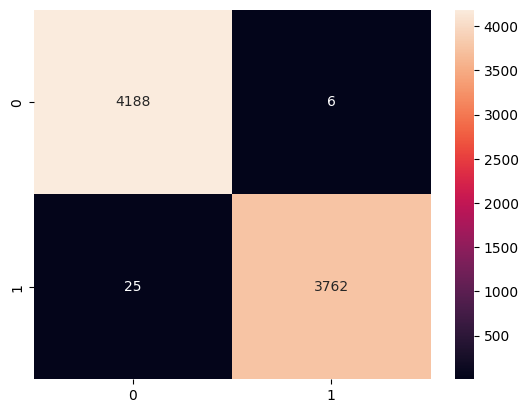

In [ ]:
sns.heatmap(metrix,annot=True,fmt='d')


In [ ]:
print(classification_report(y_test['Customer Type_disloyal Customer'],y_test['prediction']))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4194
         1.0       1.00      0.99      1.00      3787

    accuracy                           1.00      7981
   macro avg       1.00      1.00      1.00      7981
weighted avg       1.00      1.00      1.00      7981

